Import the necessary libraries

In [171]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

import datetime
from datetime import date
from sklearn.metrics import accuracy_score

In [172]:
#import the covid data set that we want to use
df = pd.read_csv(r'covid_19_indonesia_time_series_all 2.csv')

df.head(5)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [173]:
#getting 10% of the data since the data we are using it too big
# generating random sample from the dataframe
#new_df = df.sample(frac =.10)

# checking if sample is 0.10 times data or not

#if (0.10*(len(df))== len(new_df)):
#    print( "Correct")
#    print(len(df), len(new_df))

# display
#new_df.head(20)


In [174]:
#changing the format of the date
date2=[]
for item in df['Date']:
    item2=item.split('/')
    month=int(item2[0])
    day=int(item2[1])
    year=int(item2[2])
    date2+=[datetime.date(year,month,day)]
df['Date']=date2
df['Date'] = pd.to_datetime(df['Date'])

df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,2021-12-02,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,2021-12-02,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,2021-12-02,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,2021-12-02,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [175]:
#checking the info and description of the data
print('------INFO-----')

df.info()

------INFO-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         21759 non-null  datetime64[ns]
 1   Location ISO Code            21759 non-null  object        
 2   Location                     21759 non-null  object        
 3   New Cases                    21759 non-null  int64         
 4   New Deaths                   21759 non-null  int64         
 5   New Recovered                21759 non-null  int64         
 6   New Active Cases             21759 non-null  int64         
 7   Total Cases                  21759 non-null  int64         
 8   Total Deaths                 21759 non-null  int64         
 9   Total Recovered              21759 non-null  int64         
 10  Total Active Cases           21759 non-null  int64         
 11  Location Level           

In [176]:
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,21759.000000,21759.000000,21759.000000,21759.000000,2.175900e+04,21759.000000,2.175900e+04,21759.000000,0.0,21759.000000,...,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,20572.000000,19292.000000
mean,391.293580,13.220415,377.310998,0.762167,8.525997e+04,2648.289352,7.671260e+04,5899.079002,NaN,24.160256,...,744.989784,113.680803,-2.731868,29.393033,6183.650588,0.852727,163.542156,16.354192,1.395671,1.074145
std,2074.551043,76.482617,1999.062563,937.213509,3.685133e+05,11776.011067,3.403957e+05,27518.102431,NaN,68.708265,...,2743.209719,9.857587,3.608264,69.941090,10288.123342,2.277310,254.195761,25.419595,3.080207,1.578502
min,0.000000,0.000000,0.000000,-25725.000000,1.000000e+00,0.000000,0.000000e+00,-2306.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,4.000000,-16.000000,1.822500e+03,50.000000,1.038500e+03,182.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,1.750000,415.915000,0.000000,10.880000,1.090000,0.650000,0.660000
50%,41.000000,1.000000,31.000000,0.000000,1.078000e+04,283.000000,8.745000e+03,919.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,8.160000,2727.460000,0.180000,73.550000,7.350000,0.990000,1.000000
75%,151.000000,5.000000,143.000000,27.000000,3.646450e+04,1050.000000,3.293250e+04,2607.500000,NaN,18.000000,...,262.700000,121.201093,0.212037,26.260000,7374.120000,0.750000,195.850000,19.585000,1.330000,1.000000
max,56757.000000,2069.000000,48832.000000,36726.000000,4.257243e+06,143858.000000,4.105680e+06,574135.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1348.130000,79663.790000,63.800000,1533.980000,153.400000,175.000000,134.500000


In [177]:
missing_new_df = df[df.isna().any(axis=1)]
missing_new_df.head(100)
#print(len(missing_new_df))

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.0,1.00
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-03-16,ID-RI,Riau,0,0,0,0,2,0,3,...,0.511648,0.00,0.33,0.00,0.00,0.00,0.00%,150.00%,1.0,1.00
96,2020-03-16,ID-SG,Sulawesi Tenggara,2,0,0,2,3,0,0,...,-4.124689,0.76,1.14,0.00,0.00,0.00,0.00%,0.00%,NaN,1.00
97,2020-03-17,ID-BA,Bali,0,0,0,0,1,1,3,...,-8.369472,0.00,0.24,0.00,0.24,0.02,100.00%,300.00%,1.0,1.00
98,2020-03-17,ID-BT,Banten,0,1,3,-4,6,8,109,...,-6.456736,0.00,0.56,0.09,0.75,0.07,133.33%,1816.67%,0.0,NaN


Data Cleaning

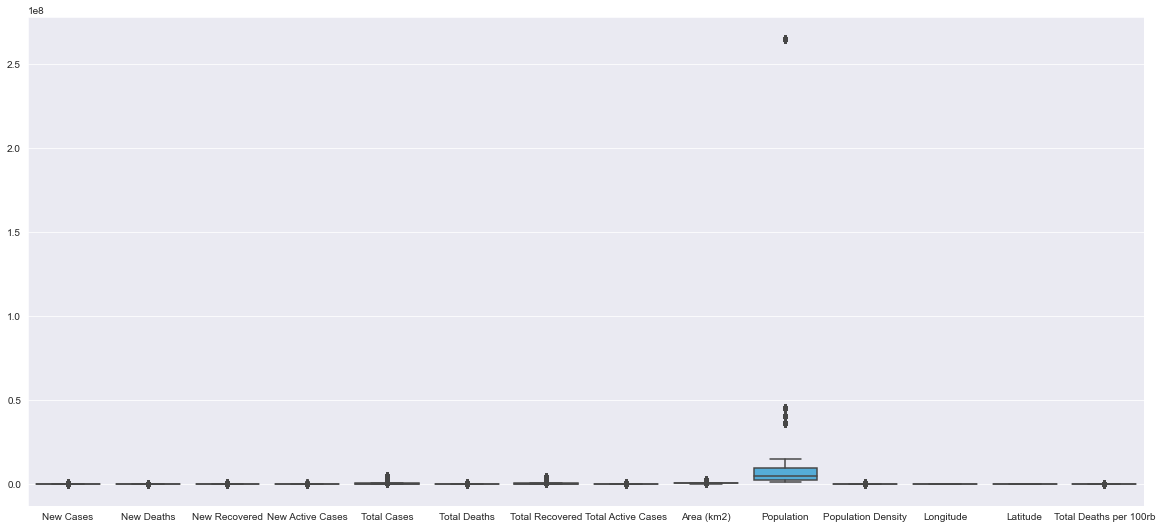

In [182]:
from sklearn.impute import SimpleImputer
#removing the column with all null values and the column that is not needed and replacing missing values with most frequent
new_data = df.drop(['City or Regency','Location ISO Code',
                'Province','Country','Continent','Island','Time Zone','Special Status',
                'Total Regencies','Total Cities','Total Districts','Total Urban Villages',
                'Total Rural Villages','New Cases per Million','Total Cases per Million',
                'New Deaths per Million','Total Deaths per Million','Case Fatality Rate',
                'Case Recovered Rate','Growth Factor of New Cases','Growth Factor of New Deaths'],axis = 1)

header_names = ['Date', 'Location', 'New Cases', 'New Deaths', 'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Total Active Cases', 'Location Level', 'Area (km2)', 'Population ', 'Population Density ', 'Longitude ', 'Latitude ', 'Total Deaths per 100rb ']

#use the simple imputer function to replace the empty values in the dataframe

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,9))

# Create a boxplot of the data
sns.boxplot(data=new_data)
# Show the plot
plt.show()



In [179]:
# Find the rows containing null values
outliers = new_data[new_data.isnull().any(axis=1)]

# Drop the rows containing null values
new_data = new_data.drop(outliers.index)

#use the simple imputer function to replace the empty values in the dataframe
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(new_data)
new_dataa = imputer.transform(new_data)

#convert the data back to a dataframe and bind the headers
new_data = pd.DataFrame(new_dataa, columns=header_names)

# Preview the data after removing the rows containing null values
new_data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
2,2020-03-02,Indonesia,2,0,0,2,2,0,0,2,Country,1916907,265185520,138.34,113.921327,-0.789275,0.0
3,2020-03-02,Riau,1,0,0,1,2,0,3,-1,Province,87024,6074100,69.8,101.805109,0.511648,0.0
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,664,10846145,16334.31,106.836118,-6.204699,0.18


In [168]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    0 non-null      datetime64[ns]
 1   Location                0 non-null      object        
 2   New Cases               0 non-null      int64         
 3   New Deaths              0 non-null      int64         
 4   New Recovered           0 non-null      int64         
 5   New Active Cases        0 non-null      int64         
 6   Total Cases             0 non-null      int64         
 7   Total Deaths            0 non-null      int64         
 8   Total Recovered         0 non-null      int64         
 9   Total Active Cases      0 non-null      int64         
 10  Location Level          0 non-null      object        
 11  Area (km2)              0 non-null      int64         
 12  Population              0 non-null      int64         
 13  Po

In [129]:
data1 = new_data[new_data['Location Level'] != 'Country']
data1.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
3,2020-03-02,Riau,1,0,0,1,2,0,3,-1,Province,87024,6074100,69.8,101.805109,0.511648,0.0
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
6,2020-03-03,Jawa Barat,1,1,0,0,1,1,8,-8,Province,35378,45161325,1276.55,107.603708,-6.920432,0.0


In [130]:
#dropping duplicates of the location
new_data1 = data1.drop_duplicates(subset='Location', keep="last")
new_data1.head(34)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21364,2021-11-21,Gorontalo,1,0,0,1,11834,460,11374,0,Province,11257,1180651,104.88,122.376058,0.687003,38.96
21617,2021-11-28,Maluku Utara,2,0,3,-1,12101,303,11757,41,Province,31983,1307803,40.89,127.539107,0.212037,23.17
21700,2021-12-01,Bengkulu,1,0,0,1,23104,473,22612,19,Province,19919,1999539,100.38,102.338421,-3.533584,23.66
21712,2021-12-01,Kalimantan Utara,1,0,0,1,35885,811,35039,35,Province,75468,648407,8.59,116.218879,2.891013,125.08
21714,2021-12-01,Kepulauan Riau,2,0,0,2,53884,1748,52120,16,Province,8202,1929400,235.24,108.261746,3.916346,90.6
21716,2021-12-01,Maluku,1,0,0,1,14587,261,14310,16,Province,46914,1847097,39.37,129.576792,-3.192572,14.13
21722,2021-12-01,Sulawesi Barat,1,0,0,1,12353,346,12001,6,Province,16787,1559984,92.93,119.345019,-2.461746,22.18
21730,2021-12-02,Aceh,2,0,0,2,38416,2066,36333,17,Province,57956,5247257,90.54,96.910522,4.225615,39.37
21731,2021-12-02,Bali,15,1,1,13,114233,4046,110003,184,Province,5780,4216171,729.43,115.131714,-8.369472,95.96
21732,2021-12-02,Banten,16,0,1,15,132693,2688,129872,133,Province,9663,10722374,1109.64,106.109004,-6.456736,25.07


In [131]:
new_data1.shape

(34, 17)

FILTERING

In [132]:
#filtering out the rows and sorting them in descending order
#This code filters out the rows with 'Indonesia' as the 'Location' and then sorts the remaining rows in descending order based on the 'Total Cases' column. The resulting data is then returned.

new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21733,2021-12-02,DKI Jakarta,28,0,0,28,864045,13596,849875,574,Province,664,10846145,16334.31,106.836118,-6.204699,125.35
21737,2021-12-02,Jawa Barat,83,0,6,77,707934,14737,692101,1096,Province,35378,45161325,1276.55,107.603708,-6.920432,32.63
21738,2021-12-02,Jawa Tengah,30,1,6,23,486435,30225,454837,1373,Province,32801,36364072,1108.64,110.201115,-7.259097,83.12
21739,2021-12-02,Jawa Timur,35,0,11,24,399478,29697,369537,244,Province,47803,40479023,846.78,112.732941,-7.723346,73.36
21743,2021-12-02,Kalimantan Timur,7,0,2,5,158245,5449,152714,82,Province,129067,3552191,27.52,116.46844,0.453858,153.4
21734,2021-12-02,Daerah Istimewa Yogyakarta,7,0,0,7,156769,5263,150965,541,Province,3133,3631015,1158.9,110.444878,-7.894502,144.95
21732,2021-12-02,Banten,16,0,1,15,132693,2688,129872,133,Province,9663,10722374,1109.64,106.109004,-6.456736,25.07
21750,2021-12-02,Riau,4,0,0,4,128825,4109,124123,593,Province,87024,6074100,69.8,101.805109,0.511648,67.65
21731,2021-12-02,Bali,15,1,1,13,114233,4046,110003,184,Province,5780,4216171,729.43,115.131714,-8.369472,95.96
21751,2021-12-02,Sulawesi Selatan,1,1,1,-1,109919,2238,107630,51,Province,46717,9426885,201.78,120.162056,-3.731081,23.74


VISUALIZING THE DATA

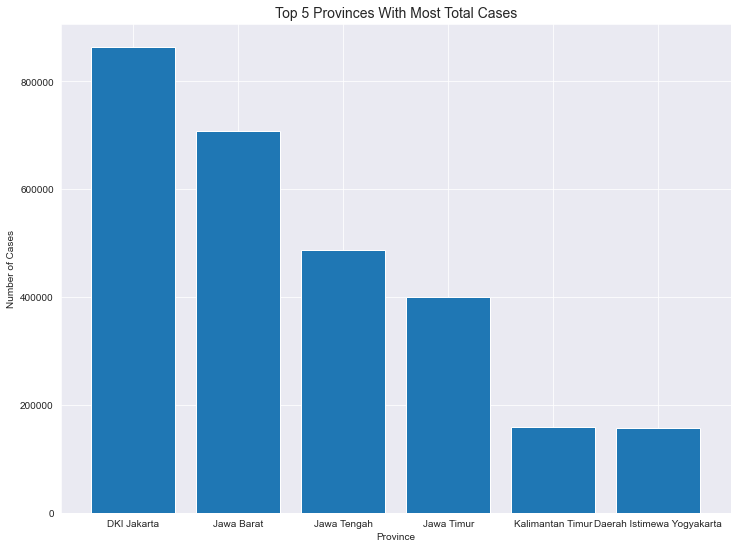

In [133]:
#plotting a bar plot of provinces with the most total cases
plt.figure(figsize=(12,9))
plt.bar(new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Location'].values[:6], new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Total Cases'].values[:6])
plt.title('Top 5 Provinces With Most Total Cases', fontsize=14)
plt.xlabel('Province')
plt.ylabel('Number of Cases')
plt.show()

In [134]:
new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21738,2021-12-02,Jawa Tengah,30,1,6,23,486435,30225,454837,1373,Province,32801,36364072,1108.64,110.201115,-7.259097,83.12
21739,2021-12-02,Jawa Timur,35,0,11,24,399478,29697,369537,244,Province,47803,40479023,846.78,112.732941,-7.723346,73.36
21737,2021-12-02,Jawa Barat,83,0,6,77,707934,14737,692101,1096,Province,35378,45161325,1276.55,107.603708,-6.920432,32.63
21733,2021-12-02,DKI Jakarta,28,0,0,28,864045,13596,849875,574,Province,664,10846145,16334.31,106.836118,-6.204699,125.35
21743,2021-12-02,Kalimantan Timur,7,0,2,5,158245,5449,152714,82,Province,129067,3552191,27.52,116.46844,0.453858,153.4
21734,2021-12-02,Daerah Istimewa Yogyakarta,7,0,0,7,156769,5263,150965,541,Province,3133,3631015,1158.9,110.444878,-7.894502,144.95
21750,2021-12-02,Riau,4,0,0,4,128825,4109,124123,593,Province,87024,6074100,69.8,101.805109,0.511648,67.65
21731,2021-12-02,Bali,15,1,1,13,114233,4046,110003,184,Province,5780,4216171,729.43,115.131714,-8.369472,95.96
21745,2021-12-02,Lampung,2,0,0,2,49691,3866,45271,554,Province,34624,9095591,262.7,105.021437,-4.916793,42.5
21756,2021-12-02,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,91592,8217551,89.72,104.169465,-3.216212,37.37


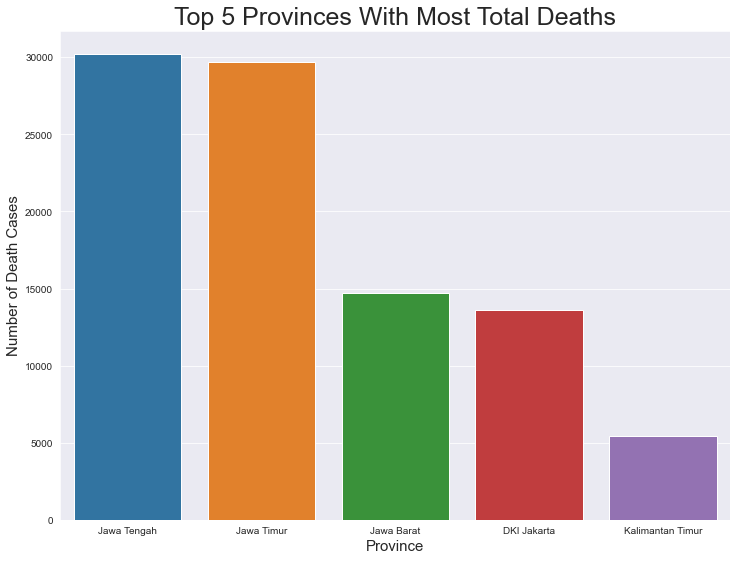

In [135]:
# plotting a bar plot of provinces with the most total deaths using seaborn
import seaborn as sns
plt.figure(figsize=(12,9))
sns.barplot(x=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Location'].values[:5], y=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Total Deaths'].values[:5])
plt.title('Top 5 Provinces With Most Total Deaths', fontsize=25)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Number of Death Cases', fontsize=15)
plt.show()

In [136]:
#sorting the data from descending order of total recoveries
new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21733,2021-12-02,DKI Jakarta,28,0,0,28,864045,13596,849875,574,Province,664,10846145,16334.31,106.836118,-6.204699,125.35
21737,2021-12-02,Jawa Barat,83,0,6,77,707934,14737,692101,1096,Province,35378,45161325,1276.55,107.603708,-6.920432,32.63
21738,2021-12-02,Jawa Tengah,30,1,6,23,486435,30225,454837,1373,Province,32801,36364072,1108.64,110.201115,-7.259097,83.12
21739,2021-12-02,Jawa Timur,35,0,11,24,399478,29697,369537,244,Province,47803,40479023,846.78,112.732941,-7.723346,73.36
21743,2021-12-02,Kalimantan Timur,7,0,2,5,158245,5449,152714,82,Province,129067,3552191,27.52,116.46844,0.453858,153.4
21734,2021-12-02,Daerah Istimewa Yogyakarta,7,0,0,7,156769,5263,150965,541,Province,3133,3631015,1158.9,110.444878,-7.894502,144.95
21732,2021-12-02,Banten,16,0,1,15,132693,2688,129872,133,Province,9663,10722374,1109.64,106.109004,-6.456736,25.07
21750,2021-12-02,Riau,4,0,0,4,128825,4109,124123,593,Province,87024,6074100,69.8,101.805109,0.511648,67.65
21731,2021-12-02,Bali,15,1,1,13,114233,4046,110003,184,Province,5780,4216171,729.43,115.131714,-8.369472,95.96
21751,2021-12-02,Sulawesi Selatan,1,1,1,-1,109919,2238,107630,51,Province,46717,9426885,201.78,120.162056,-3.731081,23.74


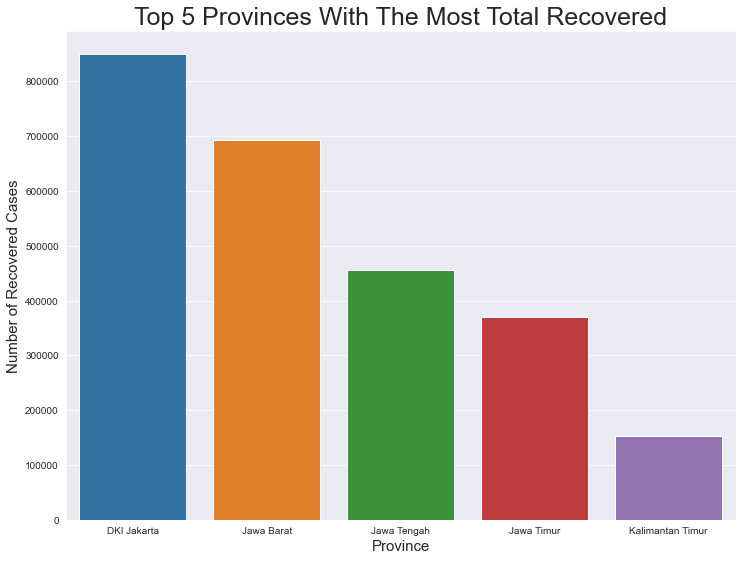

In [137]:
# plotting a bar plot of provinces with the most total recovered using seaborn

plt.figure(figsize=(12,9))
sns.barplot(x=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Location'].values[:5], y=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Total Recovered'].values[:5])
plt.title('Top 5 Provinces With The Most Total Recovered', fontsize=25)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Number of Recovered Cases', fontsize=15)
plt.show()

In [138]:
#sorting the data from descending order of total active cases
new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21748,2021-12-02,Papua,2,0,0,2,34341,559,32074,1708,Province,319036,4340348,13.6,138.69603,-4.66621,12.88
21738,2021-12-02,Jawa Tengah,30,1,6,23,486435,30225,454837,1373,Province,32801,36364072,1108.64,110.201115,-7.259097,83.12
21737,2021-12-02,Jawa Barat,83,0,6,77,707934,14737,692101,1096,Province,35378,45161325,1276.55,107.603708,-6.920432,32.63
21750,2021-12-02,Riau,4,0,0,4,128825,4109,124123,593,Province,87024,6074100,69.8,101.805109,0.511648,67.65
21733,2021-12-02,DKI Jakarta,28,0,0,28,864045,13596,849875,574,Province,664,10846145,16334.31,106.836118,-6.204699,125.35
21745,2021-12-02,Lampung,2,0,0,2,49691,3866,45271,554,Province,34624,9095591,262.7,105.021437,-4.916793,42.5
21734,2021-12-02,Daerah Istimewa Yogyakarta,7,0,0,7,156769,5263,150965,541,Province,3133,3631015,1158.9,110.444878,-7.894502,144.95
21749,2021-12-02,Papua Barat,9,0,0,9,23378,357,22771,250,Province,102955,1140701,11.08,132.976262,-2.04516,31.3
21739,2021-12-02,Jawa Timur,35,0,11,24,399478,29697,369537,244,Province,47803,40479023,846.78,112.732941,-7.723346,73.36
21731,2021-12-02,Bali,15,1,1,13,114233,4046,110003,184,Province,5780,4216171,729.43,115.131714,-8.369472,95.96


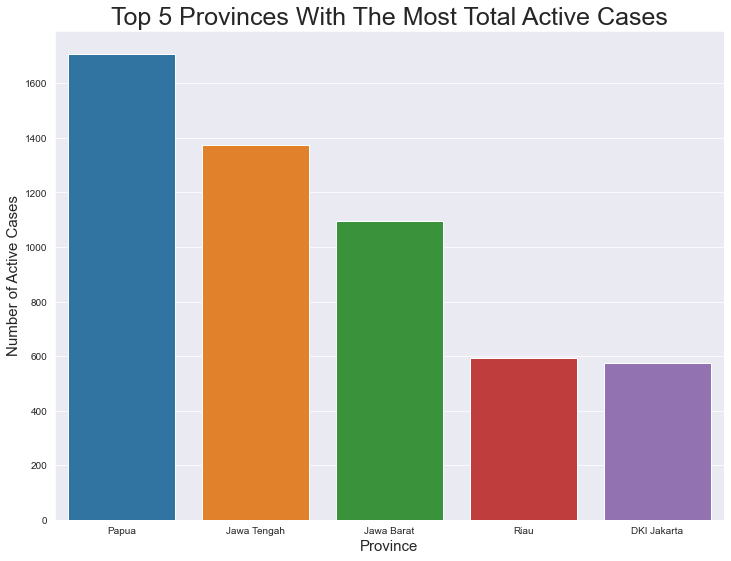

In [139]:
# plotting a bar plot of provinces with the most total active case using seaborn

plt.figure(figsize=(12,9))
sns.barplot(x=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)['Location'].values[:5], y=new_data1[new_data1.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)['Total Active Cases'].values[:5])
plt.title('Top 5 Provinces With The Most Total Active Cases', fontsize=25)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Number of Active Cases', fontsize=15)
plt.show()


In [140]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data1['Date'],
                         y=data1['Total Cases'],
                         mode='lines',
                         name= 'Total Cases'
                        ))

fig.update_layout(title='Number of Cases up to December 2021',
                 template='plotly_white',
                 xaxis_title='Date',
                 yaxis_title='Total Cases'
                 )
fig.show()

In [141]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data1['Date'],
                         y=data1['New Cases'],
                         mode='lines',
                         name= 'Total Cases'
                        ))

fig.update_layout(title='Number of New Cases until December 2021',
                 template='plotly_white',
                 xaxis_title='Date',
                 yaxis_title='Total Cases'
                 )
fig.show()

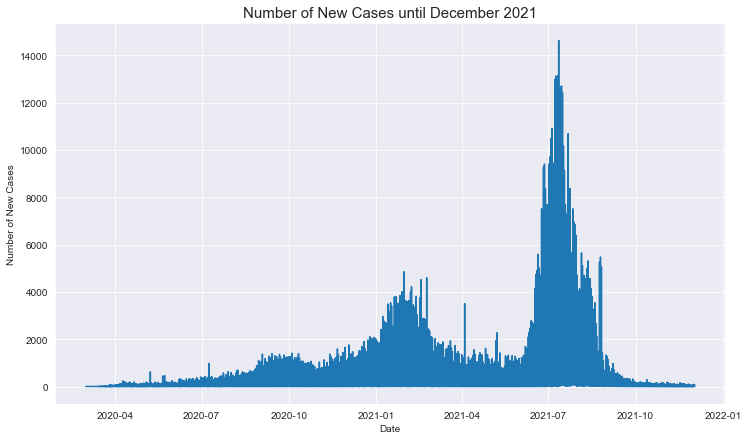

In [142]:
#trend of Covid new cases till dec 2021
plt.figure(figsize=(12,7))
plt.plot(data1['Date'].values ,data1['New Cases'].values)
plt.title('Number of New Cases until December 2021', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.show()

In [143]:
#highlighting the covid 19 cases in jakarta
#getting the location of jakarta
dki = new_data[new_data.Location == 'DKI Jakarta']
dki

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
8,2020-03-04,DKI Jakarta,2,0,0,2,45,20,41,-16,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
12,2020-03-05,DKI Jakarta,0,1,0,-1,45,21,41,-17,Province,664,10846145,16334.31,106.836118,-6.204699,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,2021-11-28,DKI Jakarta,51,0,52,-1,863862,13596,849803,463,Province,664,10846145,16334.31,106.836118,-6.204699,125.35
21635,2021-11-29,DKI Jakarta,41,0,71,-30,863903,13596,849874,433,Province,664,10846145,16334.31,106.836118,-6.204699,125.35
21668,2021-11-30,DKI Jakarta,44,0,0,44,863947,13596,849874,477,Province,664,10846145,16334.31,106.836118,-6.204699,125.35
21701,2021-12-01,DKI Jakarta,70,0,1,69,864017,13596,849875,546,Province,664,10846145,16334.31,106.836118,-6.204699,125.35


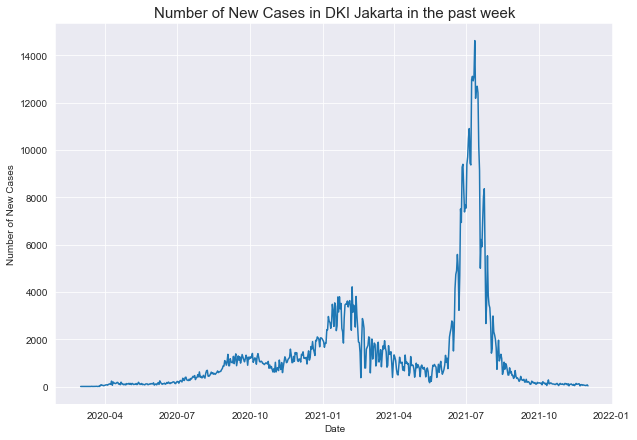

In [144]:
#trend of Covid new cases in DKI Jakarta until dec 2021
plt.figure(figsize=(10,7))
plt.plot(dki['Date'].values ,dki['New Cases'].values)
plt.title('Number of New Cases in DKI Jakarta in the past week', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.show()

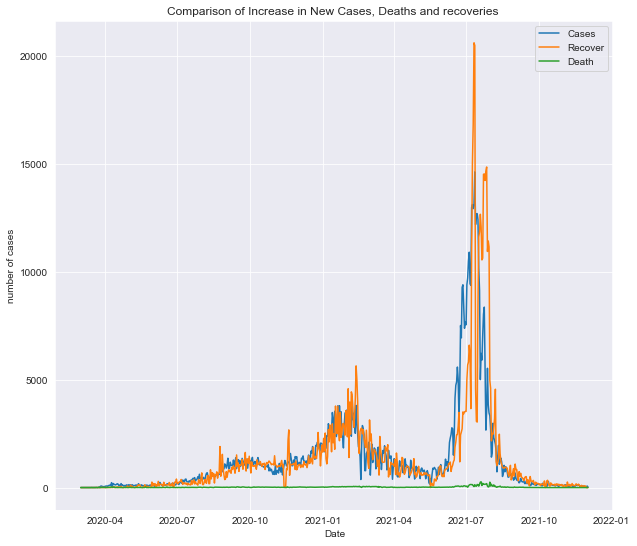

In [145]:
#Comparison of Increase in New Cases, Deaths and recoveries
plt.figure(figsize=(10,9))
plt.plot(dki['Date'].values ,dki['New Cases'].values, label='Cases')
plt.plot(dki['Date'].values, dki['New Recovered'].values, label = 'Recover')
plt.plot(dki['Date'].values, dki['New Deaths'].values, label = 'Death')
plt.title('Comparison of Increase in New Cases, Deaths and recoveries ')
plt.xlabel('Date')
plt.ylabel('number of cases')
plt.legend()
plt.show()

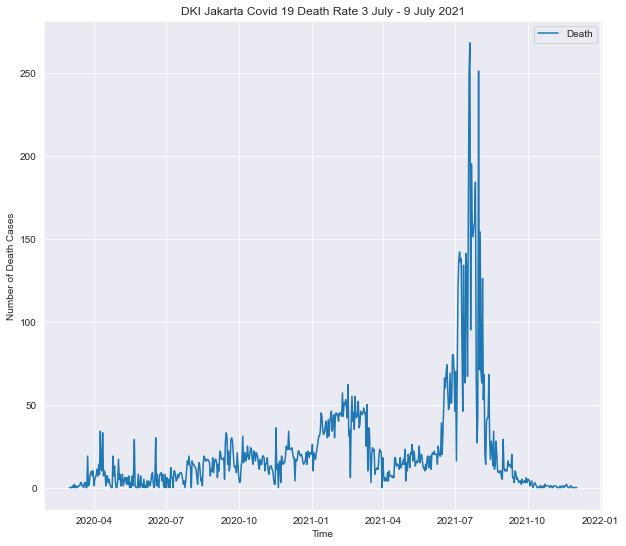

In [146]:
#Jakarta Covid 19 Death Rate until Dec 2021
plt.figure(figsize=(10,9))
plt.plot(dki['Date'].values, dki['New Deaths'].values, label = 'Death')
plt.title('DKI Jakarta Covid 19 Death Rate 3 July - 9 July 2021')
plt.xlabel('Time')
plt.ylabel('Number of Death Cases')
plt.legend()
plt.show()

In [147]:
#Seeing the correlation between variables in a heatmap
#The heatmap shows the correlations between the different columns in the data1 dataframe
plt.figure(figsize=(12,14))
sns.heatmap(data1.corr(numeric_only=True), annot=True)
plt.show()

TypeError: corr() got an unexpected keyword argument 'numeric_only'

<Figure size 864x1008 with 0 Axes>

In [ ]:
data1.head()

In [ ]:
#Focusing on only a few variables related to the Covid 19 case
data2 = data1[['New Deaths', 'New Cases','Total Cases', 'New Recovered', 'Total Recovered', 'Total Deaths','Population', 'Population Density']]
data2.head()

In [ ]:
#Checking the correlation between variables from the distribution of data on the scatter plot
sns.pairplot(data2)
plt.show()

Preparing the data for modeling and also model performance evaluation as the target header is New deaths

In [ ]:
#Location span: Provinces in Indonesia
# SPLIT DATA
X = data2.drop('New Deaths', axis = 1)
y = data2['New Deaths']

FEATURE IMPORTANCES

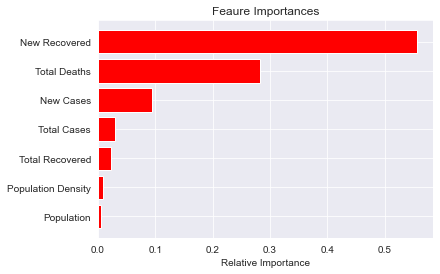

In [152]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.feature_selection import f_regression, RFE
#declare the Decision tree model
dt_model = DecisionTreeRegressor()
#dt_model = DecisionTreeClassifier()

#fit the model
#rf_model.fit(X_data,my_data.diab_class)
dt_model.fit(X, data2['New Deaths'])

train_features = X.columns
importances = dt_model.feature_importances_
indices = np.argsort(importances)[-9:] #top 10 features
plt.title('Feaure Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [train_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Feature Extraction using recursive feature elimination

In [154]:
#extract the independent data
ffe = f_regression(X, data2['New Deaths'])
variab = [ ]
for i in range(0, len(X.columns)):
    if ffe[0][i] >= 10: #check variables importance over 10%.
        variab.append(X.columns[i])
print(variab)

#declare a Decision tree model
dtr = DecisionTreeRegressor()

#recursive feature elimination
rfe = RFE(dtr, n_features_to_select=5, step=1)
rfe = rfe.fit(X, data2['New Deaths'])


print("Number of Features: ", rfe.n_features_)
print("Selected Features: ", rfe.support_)
print("Features Ranking: ", rfe.ranking_)

['New Cases', 'Total Cases', 'New Recovered', 'Total Recovered', 'Total Deaths', 'Population', 'Population Density']
Number of Features:  5
Selected Features:  [ True  True  True  True  True False False]
Features Ranking:  [1 1 1 1 1 3 2]


In [ ]:
from sklearn.model_selection import train_test_split

#Train_test_split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scaling the data

In [ ]:
#Scaling the Data, so that the nominal data numbers can be on the same scale
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# PREDICT DATA, MODELLING & PERFORMANCE EVALUATION
def predict_model(model, trainX, testX, trainY, testY):
    m = model
    m.fit(trainX, trainY)
    predict_m = m.predict(testX)
    print('-----------{}-----------'.format(model))
    print_evaluate(testY, predict_m)

def print_evaluate(Actual, predicted):
    mae = mean_absolute_error(Actual, predicted)
    mse = mean_squared_error(Actual, predicted)
    rmse = np.sqrt(mean_squared_error(Actual, predicted))
    r2_square = r2_score(Actual, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Score', r2_square)
    print('__________________________________')

In [ ]:


model = [LinearRegression(), SVR(), DecisionTreeRegressor(),svm.SVC(kernel='rbf'), DecisionTreeClassifier()]
for i in model:
    predict_model(i, X_train_scaled,X_test_scaled, y_train, y_test)


Because the Decision tree regressor results have the highest R2 score, next we will predict deaths vs. Actual deaths

In [ ]:
#the best model to use there is the decision tree regressor model, and we would use it to predict the new deaths
dtr = DecisionTreeRegressor()
#dtr = DecisionTreeClassifier(random_state=None)
dtr.fit(X_train_scaled, y_train)

new_pred = dtr.predict(X_test_scaled)
print_evaluate(y_test, new_pred)

In [ ]:
#creating a new dataframe
new_df = pd.DataFrame({'Actual values of new death':y_test, 'Predicted values of new deaths':new_pred})
new_df.head(50)

In [ ]:
#plotting the actual and predicted values
plt.figure(figsize=(10,8))
plt.plot(new_df['Actual values of new death'].values[:50], label = 'Actual values')
plt.plot(new_df['Predicted values of new deaths'].values[:50], label = 'Predicted Values')
plt.legend()
plt.show()

It can be seen that there are still some predictions that are offset because the R2 score is "only" around 80%.

In [ ]:
#filters the data to only include observations from Indonesia, and then drops the unnecessary columns.
id_data = new_data[new_data['Location'] == 'Indonesia']
id_data.drop(['Date', 'Location', 'Longitude', 'Latitude','Location Level'], axis=1, inplace=True)
id_data

heatmap of the indonesia data correlation

In [ ]:
#check the heatmap correlation for the location scale of Indonesia
plt.figure(figsize=(12,10))
sns.heatmap(id_data.corr(), annot= True)

In [ ]:
#from the heatmap, we would drop the unnecessary columns we dont need
id_data.drop(['Area (km2)', 'Population Density','Population'], axis=1, inplace=True)
id_data.head()

Preparation for data modeling and model performance evaluation
Location span: Country Indonesia

In [ ]:
# SPLIT DATA
X = id_data.drop('New Deaths', axis=1)
y = id_data['New Deaths']

In [ ]:
#Train_test_split the Data into 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#Scaling the Data, so that the nominal data numbers can be on the same scale
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# PREDICT DATA, MODELLING & PERFORMANCE EVALUATION
def predict_model(model, trainX, testX, trainY, testY):
    m = model
    m.fit(trainX, trainY)
    predict_m = m.predict(testX)
    print('-----------{}-----------'.format(model))
    print_evaluate(testY, predict_m)

def print_evaluate(Actual, predicted):
    mae = mean_absolute_error(Actual, predicted)
    mse = mean_squared_error(Actual, predicted)
    rmse = np.sqrt(mean_squared_error(Actual, predicted))
    r2_square = r2_score(Actual, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 score', r2_square)
    print('__________________________________')

In [ ]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

model = [LinearRegression(), SVR(), DecisionTreeRegressor(),svm.SVC(kernel='rbf'), DecisionTreeClassifier()]
for i in model:
    predict_model(i, X_train_scaled,X_test_scaled, y_train, y_test)

Linear regression shows that the model is too perfect no errors which is good but clearly overfits the data

In [ ]:
#so we use the decision tree classifier and decision tree regressor to make predictions
dtc = DecisionTreeClassifier(random_state=None)
dtr = LinearRegression()

#fitting the training data into the model
dtc.fit(X_train_scaled, y_train)
dtr.fit(X_train_scaled, y_train)

predictions = dtc.predict(X_test_scaled)
print_evaluate(y_test, predictions)

print("---------------------dtr----------------")
prediction = dtr.predict(X_test_scaled)
print_evaluate(y_test, prediction)

In [148]:
#creating a new dataframe
new_df1 = pd.DataFrame({'Actual values of new death':y_test, 'Predicted values of new deaths':prediction})
new_df.head(10)

NameError: name 'prediction' is not defined